In [405]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [406]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [407]:
from scipy.interpolate import griddata
import matplotlib.ticker as ticker
import scipy

#Shell environment
import os
import sys
import subprocess		# to send python variables to shell.

# Permutations
import itertools

-2.831375832757856 0.06611037685684212


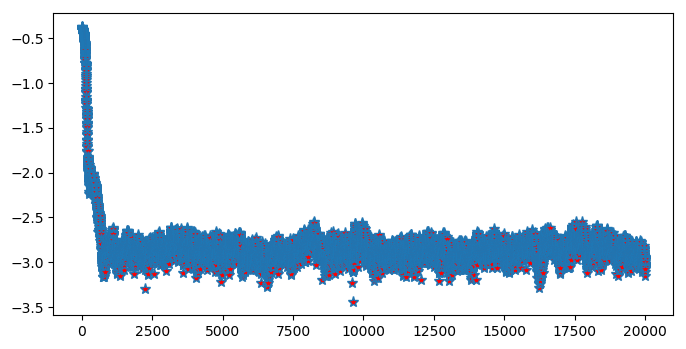

In [404]:
# He

def distance(_x):
    return np.sqrt(np.dot(_x,_x))

#Change here.
def potentialV(_xp):                   
#     He atom                        
    r1 = distance(_xp[0:nD])
    r2 = distance(_xp[nD:2*nD])
    r12 = distance(_xp[0:nD] - _xp[nD:2*nD])
    return -2.0/r1 - 2.0/r2 + 1.0/r12

# Initiate variables
nP = 2 # Number of particles
nD = 3 # Number of dimension
nM = 3000 # Number of walkers.
Alpha = 1.0
dtau = 0.02
nDMC = 20000
###

xsample = np.array( [ np.random.uniform(-10.0,10.0, nD*nP) for _iM in range(nM)]) # Initial random starting point.
# xsample = np.array( [ np.linspace(-5.0,5.0, nD*nP) for _iM in range(nM)]) # Initial random starting point.

list_Eguess = np.array([]).reshape(0,4)

for _iDMC in range(nDMC):
    _xproposed = np.array([]).reshape(0,nP*nD)
    _nM = len(xsample)
    
    Eguess = 0.0
    for _iP in range(_nM):
        Eguess = Eguess + potentialV(xsample[_iP])/_nM
    Eguess = Eguess - Alpha*np.log(_nM/nM)
    list_Eguess = np.vstack(( list_Eguess, np.array([_iDMC, Eguess, _nM, nM]) ))

    xsample = xsample +  np.array( [np.random.normal(0.0, np.sqrt(dtau) ,nD*nP) for _iM in range(_nM)] )
    
    for _iM in range(_nM):
         # Branching.
        _potential = np.exp( -dtau*( potentialV(xsample[_iM]) - Eguess ) ) 
        _mNumber = int( _potential + np.random.uniform(0,1,1) )
        if _mNumber > 0 :
            _xproposed = np.append(_xproposed, [xsample[_iM]], axis=0)  
        if _mNumber > 1 :
            _xproposed = np.append(_xproposed, [xsample[_iM]], axis=0)
    xsample = np.copy(_xproposed)

fig, ax = plt.subplots(1,1, figsize=(8,4), dpi=100)
marksize = 8
fontl = 8

ax.plot(list_Eguess[:,0], list_Eguess[:,1], '*', markerfacecolor='r', markersize = marksize, label="H" )
print(np.mean(list_Eguess[:,1]),np.var(list_Eguess[:,1]))

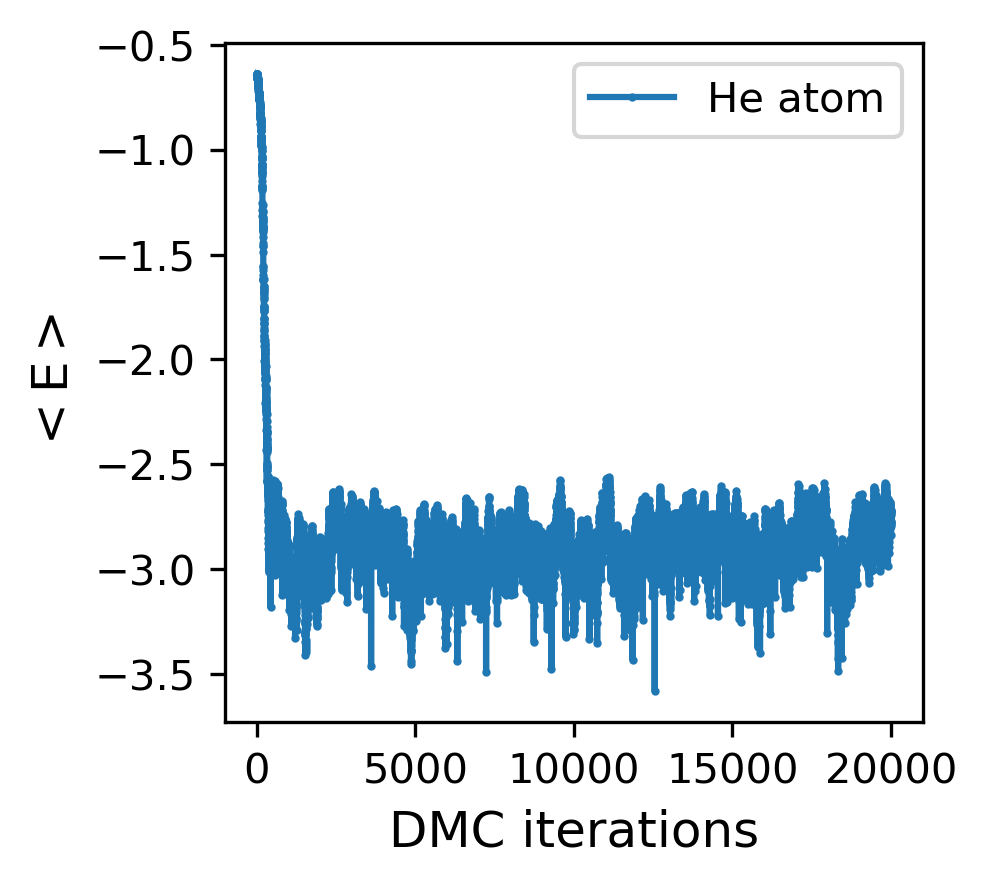

-2.8619357439037447 0.06100262712086225
-0.5271490805861316 0.000666967840694923
-2.334786663317613


In [424]:
data = genfromtxt("./mutliruns/He/dmcout.dat")
# data = genfromtxt("./mutliruns/Hatom/dmcout.dat")
# data1 = genfromtxt("./mutliruns/Hion/dmcout.dat")

# Plots for MH
### Plot
fig, ax = plt.subplots(1,1, figsize=(3,3), dpi=300)
marksize = 1
fontl = 10

ax.plot(data[:,0],data[:,1], '-o', markerfacecolor='r', markersize = marksize, label="He atom" )
# ax.plot(data1[:,0],data1[:,1], '-*', markerfacecolor='r', markersize = marksize, label="H ion" )

# ax.set_ylim(0,10)
ax.set_xlabel(r'DMC iterations', fontsize = 1.2*fontl)
ax.set_ylabel(r'$\mathrm{<E>}$', fontsize = 1.2*fontl)
ax.legend( loc='upper right', frameon = 'True')
ax.tick_params(axis='both', which='major', labelsize=1.0*fontl) 
#ax.tick_params(axis='y', left='off', top='off', right='off', bottom='off', labelleft='off', labeltop='off', labelright='off', labelbottom='off', labelsize=0.4*fontl) 

# fig.savefig('test.eps', bbox_inches='tight')
# fig.savefig('test.pdf', bbox_inches='tight')
fig.savefig('test.jpg', bbox_inches='tight')

plt.show()
print(np.mean(data[:,1]),np.var(data[:,1]))
print(np.mean(data1[:,1]),np.var(data1[:,1]))
print(np.mean(data[:,1])-np.mean(data1[:,1]))

2.0597147718225575 0.9249565342529892


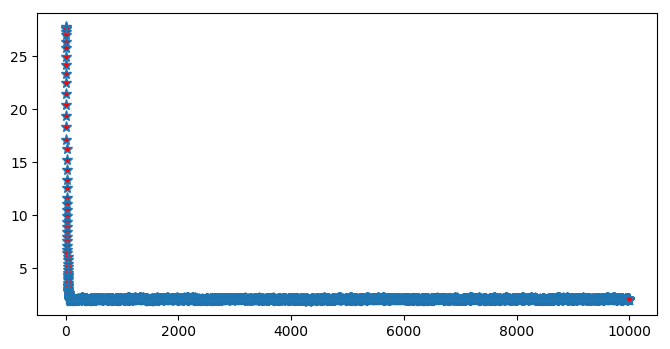

In [391]:
# Test cases
# SHO

def distance(_x):
    return np.sqrt(np.dot(_x,_x))

#Change here.
def potentialV(_xp):                   
    r1 = distance(_xp)
    return 0.5*r1**2
# potentialV = np.vectorize(potentialV)

# Initiate variables
nP = 2 # Number of particles
nD = 2 # Number of dimension
nM = 1200 # Number of walkers.
Alpha = 1.0
dtau = 0.05
nDMC = 10000
###

# xsample = np.array( [ np.random.uniform(-5.0,5.0, nD*nP) for _iM in range(nM)]) # Initial random starting point.
xsample = np.array( [ np.linspace(-5.0,5.0, nD*nP) for _iM in range(nM)]) # Initial random starting point.

list_Eguess = np.array([]).reshape(0,4)

for _iDMC in range(nDMC):
    _xproposed = np.array([]).reshape(0,nP*nD)
    _nM = len(xsample)
    
    Eguess = 0.0
    for _iP in range(_nM):
        Eguess = Eguess + potentialV(xsample[_iP])/_nM
    Eguess = Eguess - Alpha*np.log(_nM/nM)
    list_Eguess = np.vstack(( list_Eguess, np.array([_iDMC, Eguess, _nM, nM]) ))

    xsample = xsample +  np.array( [np.random.normal(0.0, np.sqrt(dtau) ,nD*nP) for _iM in range(_nM)] )
    
    for _iM in range(_nM):
         # Branching.
        _potential = np.exp( -dtau*( potentialV(xsample[_iM]) - Eguess ) ) 
        _mNumber = int( _potential + np.random.uniform(0,1,1) )
        if _mNumber > 0 :
            _xproposed = np.append(_xproposed, [xsample[_iM]], axis=0)  
        if _mNumber > 1 :
            _xproposed = np.append(_xproposed, [xsample[_iM]], axis=0)
    xsample = np.copy(_xproposed)

fig, ax = plt.subplots(1,1, figsize=(8,4), dpi=100)
marksize = 8
fontl = 8

ax.plot(list_Eguess[:,0], list_Eguess[:,1], '*', markerfacecolor='r', markersize = marksize, label="H" )
print(np.mean(list_Eguess[:,1]),np.var(list_Eguess[:,1]))